In [1]:
import numpy as np

docs = ['go india',
		'india india',
		'hip hip hurray',
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [2]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')

In [3]:
tokenizer.fit_on_texts(docs)

In [4]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [5]:
from keras.utils import pad_sequences

In [6]:
sequences = pad_sequences(sequences,padding='post')

In [7]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [8]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

In [13]:
X_train = pad_sequences(X_train,padding='post')
X_test = pad_sequences(X_test,padding='post')

In [14]:
model = Sequential()

model.add(SimpleRNN(32,input_shape=(None,1),return_sequences=False))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
782/782 [==============================] - 34s 41ms/step - loss: 0.6942 - accuracy: 0.4988 - val_loss: 0.6943 - val_accuracy: 0.5021
Epoch 2/20
782/782 [==============================] - 33s 42ms/step - loss: 0.6929 - accuracy: 0.5122 - val_loss: 0.6943 - val_accuracy: 0.5015
Epoch 3/20
782/782 [==============================] - 30s 39ms/step - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6939 - val_accuracy: 0.5026
Epoch 4/20
782/782 [==============================] - 29s 37ms/step - loss: 0.6930 - accuracy: 0.5051 - val_loss: 0.6938 - val_accuracy: 0.5073
Epoch 5/20
782/782 [==============================] - 30s 38ms/step - loss: 0.6929 - accuracy: 0.5067 - val_loss: 0.6946 - val_accuracy: 0.5023
Epoch 6/20
782/782 [==============================] - 29s 37ms/step - loss: 0.6927 - accuracy: 0.5085 - val_loss: 0.6944 - val_accuracy: 0.5021
Epoch 7/20
782/782 [==============================] - 29s 38ms/step - loss: 0.6927 - accuracy: 0.5048 - val_loss: 0.6951 - val_accuracy:

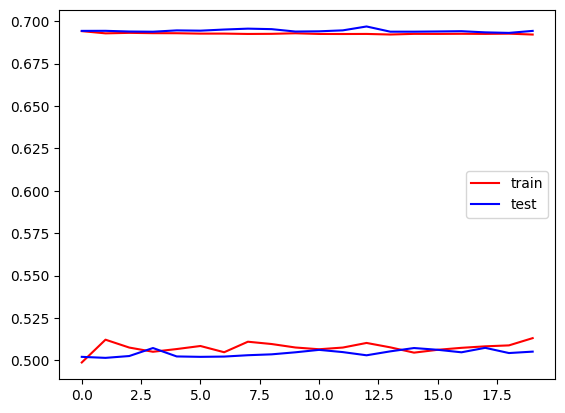

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train', color='red')
plt.plot(history.history['val_loss'],label='test', color='blue')
plt.legend()
plt.plot(history.history['accuracy'],label='train', color='red')
plt.plot(history.history['val_accuracy'],label='test', color='blue')


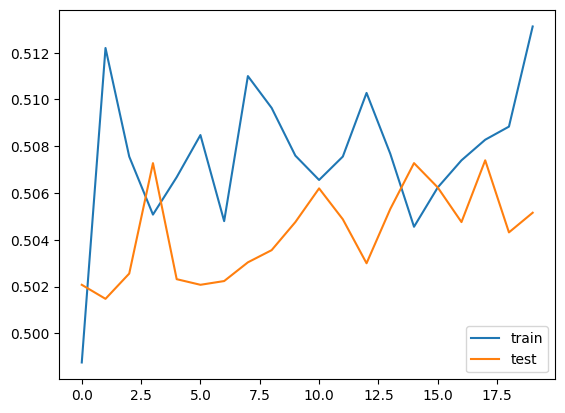

In [17]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()